<a href="https://colab.research.google.com/github/ashwinibhatM19/Samsung/blob/main/NB_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset link http://archive.ics.uci.edu/ml/datasets/Car+Evaluation

http://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data

http://archive.ics.uci.edu/ml/machine-learning-databases/car/car.names

In [111]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [112]:
!wget -nc https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

File ‘iris.data’ already there; not retrieving.



In [113]:
columns = ['sepal_length','sepal_width','petal_length','petal_width','class']


In [114]:
iris_df = pd.read_csv("iris.data", names=columns)

In [115]:
print(iris_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [116]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [117]:
X = iris_df.drop(['class'], axis=1)
y = iris_df['class']

In [118]:
y = y.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})


In [119]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [120]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=143
)

In [121]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [122]:
y_prob = gnb.predict_proba(X_test)

# Step 9: Binarize labels for multiclass ROC
y_test_bin = label_binarize(y_test, classes=[0,1,2])


In [123]:
print("ROC AUC Score:",
      roc_auc_score(y_test_bin, y_prob, multi_class='ovo', average='weighted'))

ROC AUC Score: 0.9898692810457517


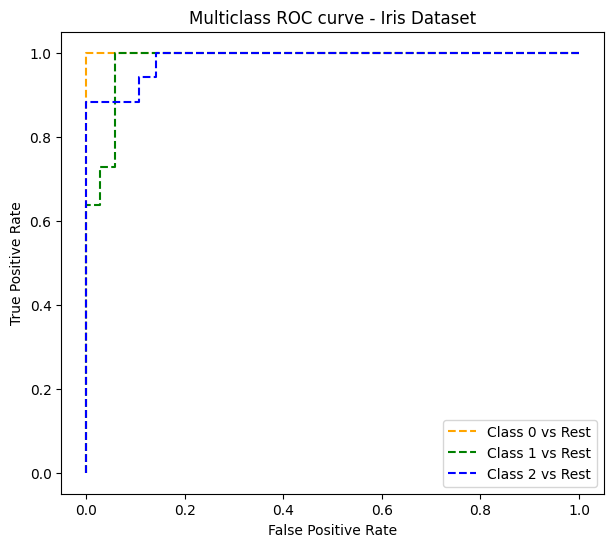

In [124]:
fpr = {}
tpr = {}
thresh = {}
n_class = y_test_bin.shape[1]

plt.figure(figsize=(7, 6))
colors = ['orange', 'green', 'blue']
for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_bin[:, i], y_prob[:, i])
    plt.plot(fpr[i], tpr[i], linestyle='--', color=colors[i], label=f'Class {i} vs Rest')

plt.title('Multiclass ROC curve - Iris Dataset')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.savefig('Iris_ROC.png', dpi=300)
plt.show()